In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from matplotlib.colors import LogNorm

In [2]:
def read_matrix(path):
    with open(path) as f:
        matrix = json.load(f)['matrix']['inner']
        matrix = np.array(matrix)
    return matrix
    
def prepare_matrices(matrices):
    global_max = max([matrix.max() for matrix in matrices])
    new_matrices = []
    for matrix in matrices:
        local_max = matrix.max();
        new_matrix = matrix / local_max * global_max
        new_matrix = new_matrix + 1 # ensure there are no 0 values for log-scale
        new_matrices.append(new_matrix)
    return new_matrices

    

In [3]:
a_ = read_matrix('../../../workload/spatials/cluster_a_2_16.json');
b_ = read_matrix('../../../workload/spatials/cluster_b_2_16.json');
c_ = read_matrix('../../../workload/spatials/cluster_c_2_16.json');
matrices = prepare_matrices([a_, b_, c_])
a = matrices[0]
b = matrices[1]
c = matrices[2]


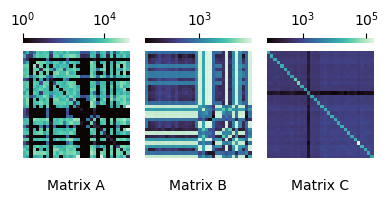

In [4]:
label_and_data = [('Matrix A', a), ('Matrix B', b), ('Matrix C', c)]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(4, 2))
for i, (label, data) in enumerate(label_and_data):
    ax = sns.heatmap(data=data, norm=LogNorm(), xticklabels=False, yticklabels=False, square=True, ax=axs[i], cbar_kws={'location':'top'},cmap='mako')
    ax.set_xlabel(label, labelpad=15)
fig.tight_layout()
plt.savefig('figs/matrices.pdf', bbox_inches='tight')